In [60]:
import torch
from network_parser import parse
import cnns
import global_v as glv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dtype = torch.float32

config_path = 'Config_files/XOR.yaml'
checkpoint_path = 'checkpoint/ckpt.pth'
params = parse(config_path)
glv.init(params)

net = cnns.Network(params['Network'], params['Layers'],\
            torch.tensor([2]).to(glv.device))
                   
checkpoint = torch.load(checkpoint_path)
net.load_state_dict(checkpoint['net'])
resolution = 0.05
outputs_size = len(np.arange(-1,1,resolution))
outputs = np.zeros((outputs_size,outputs_size))
for index_i, i in enumerate(np.arange(-1,1,resolution)):
    
    print(index_i/outputs_size*100,'%')
    for index_j, j in enumerate(np.arange(-1,1,resolution)):
        inputs = torch.tensor([i,j])
        inputs = inputs.unsqueeze_(-1).repeat(1, 1, 1, 1, glv.n_steps)
        outputs[index_i,index_j] = torch.sum(net.forward(inputs, False))/glv.n_steps


Network Structure:
linear
FC_1
input shape: [10, 2, 1, 1, 50]
weight shape:  [2, 40]
output shape: [10, 40, 1, 1, 50]
-----------------------------------------
linear
FC_2
input shape: [10, 40, 1, 1, 50]
weight shape:  [40, 20]
output shape: [10, 20, 1, 1, 50]
-----------------------------------------
linear
FC_3
input shape: [10, 20, 1, 1, 50]
weight shape:  [20, 10]
output shape: [10, 10, 1, 1, 50]
-----------------------------------------
linear
FC_4
input shape: [10, 10, 1, 1, 50]
weight shape:  [10, 10]
output shape: [10, 10, 1, 1, 50]
-----------------------------------------
-----------------------------------------
0.0 %
2.5 %
5.0 %
7.5 %
10.0 %
12.5 %
15.0 %
17.5 %
20.0 %
22.5 %
25.0 %
27.500000000000004 %
30.0 %
32.5 %
35.0 %
37.5 %
40.0 %
42.5 %
45.0 %
47.5 %
50.0 %
52.5 %
55.00000000000001 %
57.49999999999999 %
60.0 %
62.5 %
65.0 %
67.5 %
70.0 %
72.5 %
75.0 %
77.5 %
80.0 %
82.5 %
85.0 %
87.5 %
90.0 %
92.5 %
95.0 %
97.5 %


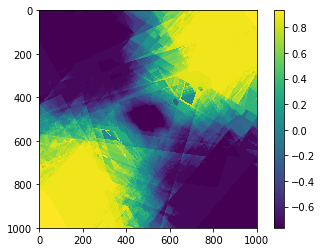

In [13]:
plt.imshow(outputs)
plt.colorbar() 02989555250

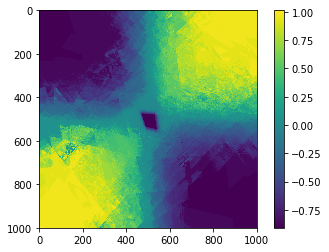

In [32]:
plt.imshow(outputs)
plt.colorbar()

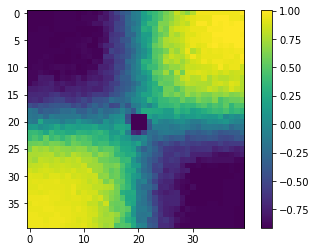

In [61]:
plt.imshow(outputs)
plt.colorbar()